Focus Area: City Services & Environmental Management

Use Case: Seasonal Service Demand Analysis with Environmental Impact Assessment

Authored by: Mengkheang Neak

Duration: 

Level: Intermediate

Pre-requisite Skills: Python, Data Analysis, Data Cleaning, Correlation Analysis, Data Visualization

Scenario: The City of Melbourne aims to optimize its public service response by understanding seasonal trends in service requests and their potential correlation with environmental factors. This use case involves analyzing the "Customer Service Requests with Resolution Time" dataset, supported by the "All Sensors Real-Time Status" and "Microclimate Sensors Data" datasets, to uncover actionable insights. The objective is to identify peak periods for specific services, explore environmental triggers that influence demand, and develop strategies to improve service delivery efficiency.

What this use case will teach you: At the end of this use case, you will:

    Learn how to clean and preprocess urban service and environmental datasets.
    Conduct exploratory data analysis (EDA) to identify seasonal trends in service demand.
    Perform correlation analysis to assess the impact of weather and sensor data on service requests.
    Visualize temporal trends and correlations between service requests and environmental conditions.
    Develop strategic recommendations to enhance resource allocation and service delivery.
    Create an actionable framework for implementing data-driven improvements in city service management.

Background and Introduction: Understanding the temporal dynamics of public service demand is crucial for efficient urban management. The City of Melbourne's service teams need to strategically allocate resources to align with seasonal peaks and environmental conditions. By leveraging public service request data and environmental factors, this analysis will provide insights to improve the responsiveness of city services and optimize resource distribution.

Datasets Used:

    Customer Service Requests with Resolution Time: Contains records of service requests, completion timelines, and associated categories.
    All Sensors Real-Time Status: Includes real-time sensor data like temperature, humidity, and other environmental readings.
    Microclimate Sensors Data: Offers detailed microclimate information such as air temperature, wind speed, and humidity.

### Importing Dataset and Cleaning Dataset


In [78]:
# Step 1: Data Cleaning and Preprocessing

# Import necessary libraries for data handling
import pandas as pd

# Load datasets from CSVs
service_data_path = r'C:\Users\User\Desktop\Deakin\Year 3\T3\SIT378 Team Project B\First Project\customer-service-requests-with-resolution-time.csv'
sensor_data_path = r'C:\Users\User\Desktop\Deakin\Year 3\T3\SIT378 Team Project B\First Project\all-sensors-real-time-status.csv'
microclimate_data_path = r'C:\Users\User\Desktop\Deakin\Year 3\T3\SIT378 Team Project B\First Project\microclimate-sensors-data.csv'

service_data = pd.read_csv(service_data_path)
sensor_data = pd.read_csv(sensor_data_path)
microclimate_data = pd.read_csv(microclimate_data_path)

# Clean and preprocess the service data
cleaned_service_data = service_data.drop_duplicates().dropna(subset=['DATE_RECEIVED', 'CATEGORY'])
cleaned_service_data['DATE_RECEIVED'] = pd.to_datetime(cleaned_service_data['DATE_RECEIVED'], utc=True)  # Ensure UTC consistency
cleaned_service_data['Month'] = cleaned_service_data['DATE_RECEIVED'].dt.month
cleaned_service_data['Year'] = cleaned_service_data['DATE_RECEIVED'].dt.year

# Clean and preprocess the sensor data
cleaned_sensor_data = sensor_data.drop_duplicates().dropna(subset=['time'])
cleaned_sensor_data['time'] = pd.to_datetime(cleaned_sensor_data['time'], utc=True)  # Ensure UTC consistency

# Clean and preprocess the microclimate data
cleaned_microclimate_data = microclimate_data.drop_duplicates().dropna(subset=['Time'])
cleaned_microclimate_data['Time'] = pd.to_datetime(cleaned_microclimate_data['Time'], utc=True)  # Ensure UTC consistency

# Display the cleaned data samples
print("Cleaned Service Data Sample:")
print(cleaned_service_data.head())
print("Shape:", cleaned_service_data.shape)

print("\nCleaned Sensor Data Sample:")
print(cleaned_sensor_data.head())
print("Shape:", cleaned_sensor_data.shape)

print("\nCleaned Microclimate Data Sample:")
print(cleaned_microclimate_data.head())
print("Shape:", cleaned_microclimate_data.shape)

# Save cleaned datasets to CSV files for further analysis if needed
cleaned_service_data.to_csv('cleaned_customer_service_requests.csv', index=False)
cleaned_sensor_data.to_csv('cleaned_sensor_data.csv', index=False)
cleaned_microclimate_data.to_csv('cleaned_microclimate_data.csv', index=False)



Cleaned Service Data Sample:
  REQUEST_STATUS             DATE_RECEIVED DATE_COMPLETED          SUBURB  \
0         CLOSED 2016-05-05 00:00:00+00:00     2016-05-12         Carlton   
1         CLOSED 2014-11-20 00:00:00+00:00     2014-11-21  East Melbourne   
2         CLOSED 2014-11-27 00:00:00+00:00     2014-12-01         Carlton   
3         CLOSED 2015-01-21 00:00:00+00:00     2015-01-22       Melbourne   
4         CLOSED 2015-01-23 00:00:00+00:00     2015-01-27       Southbank   

                            CATEGORY              SERVICE_DESC  \
0                           Graffiti          Graffiti Removal   
1  Waste, Street Cleaning and Litter     Missed Bin Collection   
2  Waste, Street Cleaning and Litter     Missed Bin Collection   
3  Waste, Street Cleaning and Litter  Street Cleaning services   
4  Waste, Street Cleaning and Litter              Damaged Bins   

   DAYS_TO_COMPLETE  Month  Year  
0                 7      5  2016  
1                 1     11  2014  
2     

# Exploratory Data Analysis (EDA)

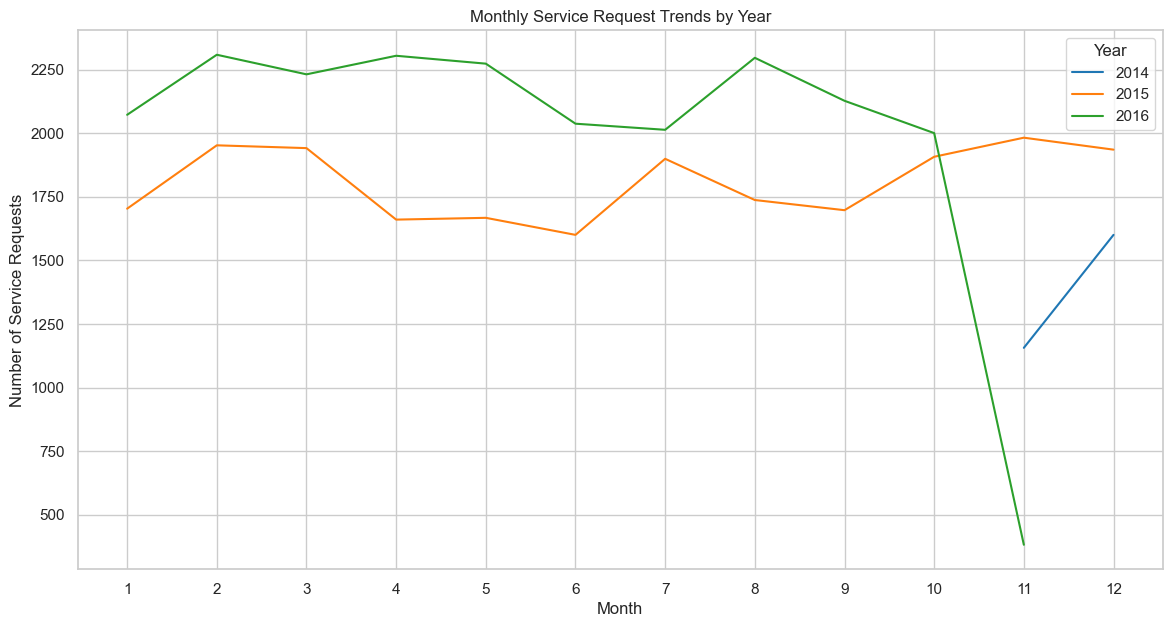

C:\Users\User\AppData\Local\Temp\ipykernel_2884\1998450957.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_service_data, y='CATEGORY', order=cleaned_service_data['CATEGORY'].value_counts().index, palette='viridis')


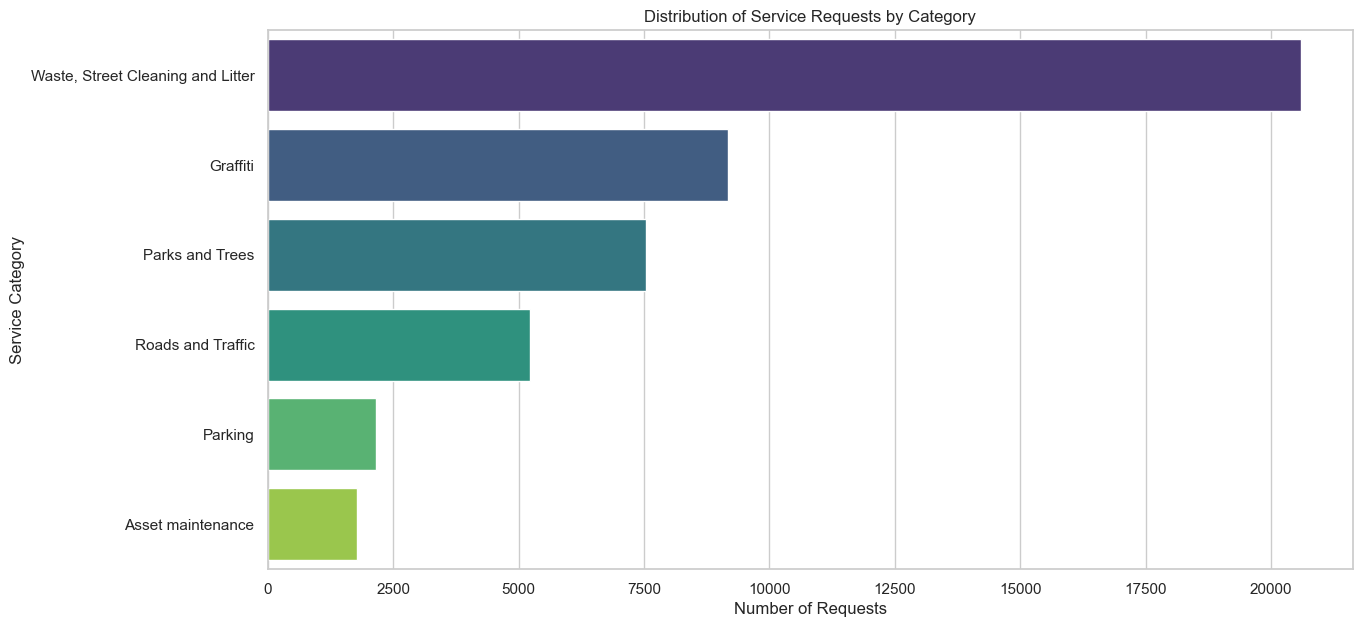

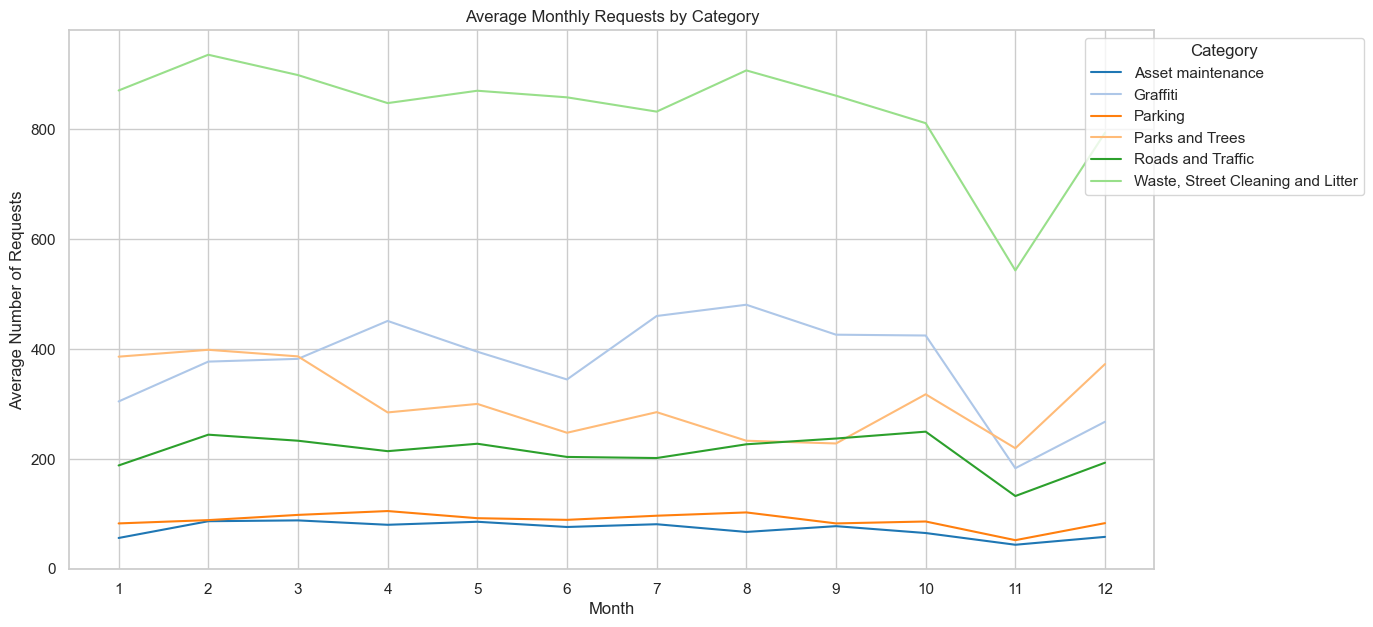

In [80]:
# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualization settings
sns.set(style="whitegrid")

# Task 2.1: Monthly Service Request Trends by Year
plt.figure(figsize=(14, 7))

# Aggregate data to show total service requests by month and year
monthly_trends = cleaned_service_data.groupby(['Year', 'Month']).size().reset_index(name='Request_Count')

# Ensure the data is not empty
if not monthly_trends.empty:
    # Plot the total number of service requests by month and year
    sns.lineplot(data=monthly_trends, x='Month', y='Request_Count', hue='Year', palette='tab10')
    plt.title('Monthly Service Request Trends by Year')
    plt.xlabel('Month')
    plt.ylabel('Number of Service Requests')
    plt.legend(title='Year')
    plt.xticks(range(1, 13))  # Set x-axis ticks for each month
    plt.show()
else:
    print("No data available for plotting monthly service request trends.")

# Task 2.2: Visualize distribution of service categories
plt.figure(figsize=(14, 7))
if not cleaned_service_data.empty:
    sns.countplot(data=cleaned_service_data, y='CATEGORY', order=cleaned_service_data['CATEGORY'].value_counts().index, palette='viridis')
    plt.title('Distribution of Service Requests by Category')
    plt.xlabel('Number of Requests')
    plt.ylabel('Service Category')
    plt.show()
else:
    print("No data available for plotting service request category distribution.")

# Task 2.3: Monthly average requests per category
monthly_category_trends = cleaned_service_data.groupby(['Year', 'Month', 'CATEGORY']).size().reset_index(name='Request_Count')
avg_monthly_trends = monthly_category_trends.groupby(['Month', 'CATEGORY'])['Request_Count'].mean().reset_index()

plt.figure(figsize=(14, 7))
if not avg_monthly_trends.empty:
    sns.lineplot(data=avg_monthly_trends, x='Month', y='Request_Count', hue='CATEGORY', palette='tab20', legend='brief')
    plt.title('Average Monthly Requests by Category')
    plt.xlabel('Month')
    plt.ylabel('Average Number of Requests')
    plt.xticks(range(1, 13))
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), ncol=1, title='Category')
    plt.show()
else:
    print("No data available for plotting average monthly requests by category.")



# Analyzing Service Request Data:

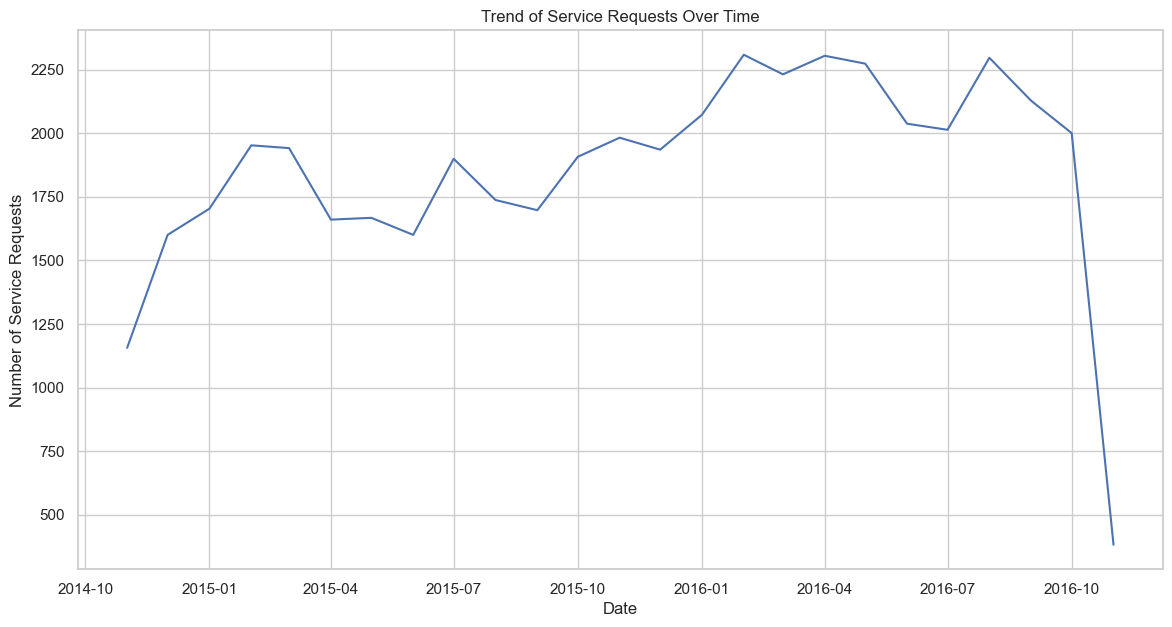

C:\Users\User\AppData\Local\Temp\ipykernel_2884\346503311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_service_data, y='CATEGORY', order=cleaned_service_data['CATEGORY'].value_counts().index, palette='viridis')


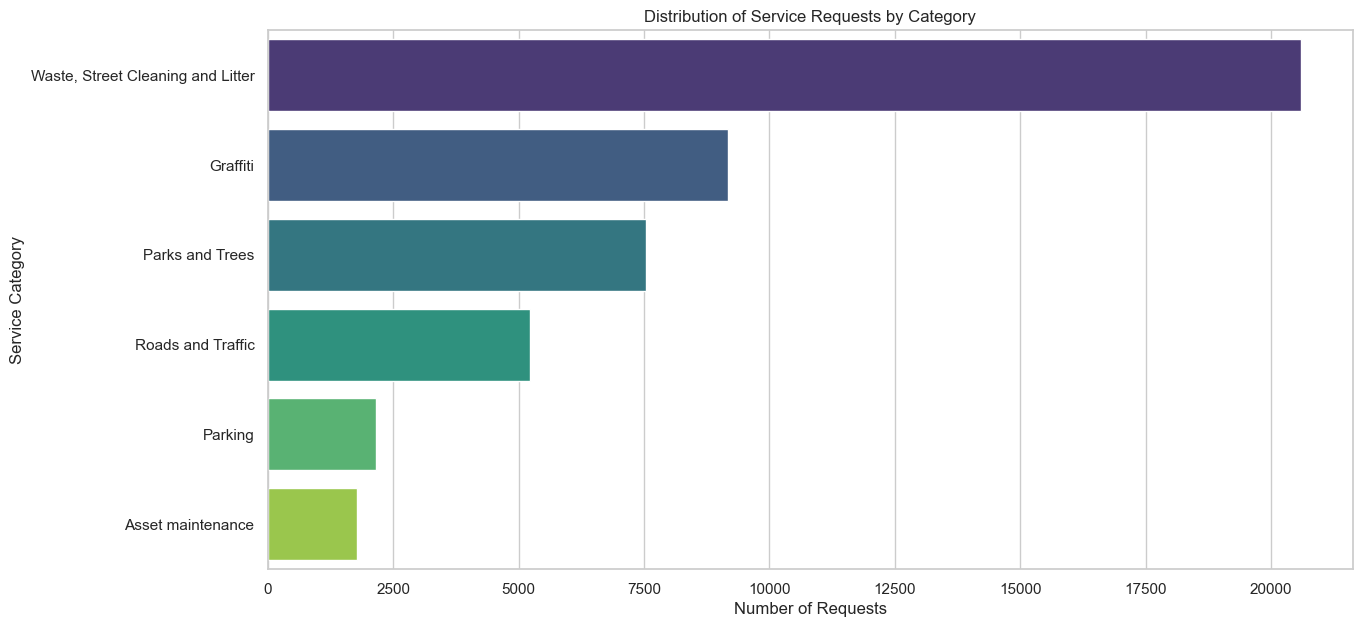

C:\Users\User\AppData\Local\Temp\ipykernel_2884\346503311.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_avg, x='Month', y='Average_Request_Count', palette='Blues_d')


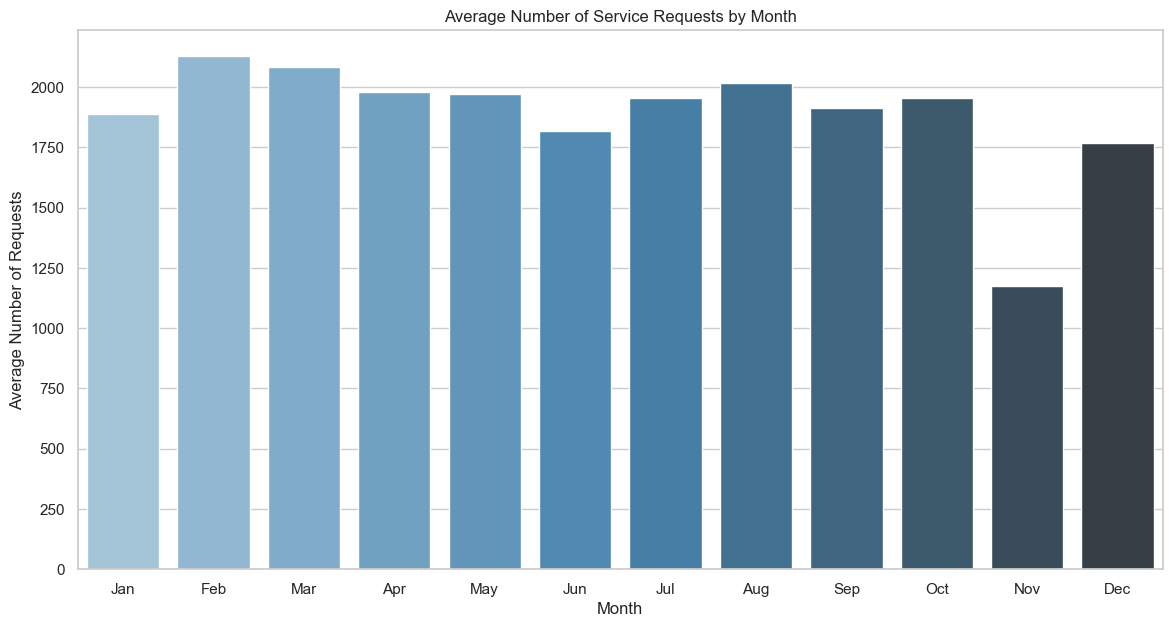

In [45]:
# Import necessary visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Configure Seaborn for consistent styling
sns.set(style="whitegrid")

# Trend analysis: Requests over time
plt.figure(figsize=(14, 7))
service_trend = cleaned_service_data.groupby(['Year', 'Month']).size().reset_index(name='Request_Count')
service_trend['Date'] = pd.to_datetime(service_trend[['Year', 'Month']].assign(Day=1))
sns.lineplot(data=service_trend, x='Date', y='Request_Count')
plt.title('Trend of Service Requests Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Service Requests')
plt.show()

# Distribution of service request categories
plt.figure(figsize=(14, 7))
sns.countplot(data=cleaned_service_data, y='CATEGORY', order=cleaned_service_data['CATEGORY'].value_counts().index, palette='viridis')
plt.title('Distribution of Service Requests by Category')
plt.xlabel('Number of Requests')
plt.ylabel('Service Category')
plt.show()

# Seasonal trend analysis
plt.figure(figsize=(14, 7))
monthly_avg = service_trend.groupby(service_trend['Date'].dt.month)['Request_Count'].mean().reset_index()
monthly_avg.columns = ['Month', 'Average_Request_Count']
sns.barplot(data=monthly_avg, x='Month', y='Average_Request_Count', palette='Blues_d')
plt.title('Average Number of Service Requests by Month')
plt.xlabel('Month')
plt.ylabel('Average Number of Requests')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()







# Analysis for Microclimate Data:

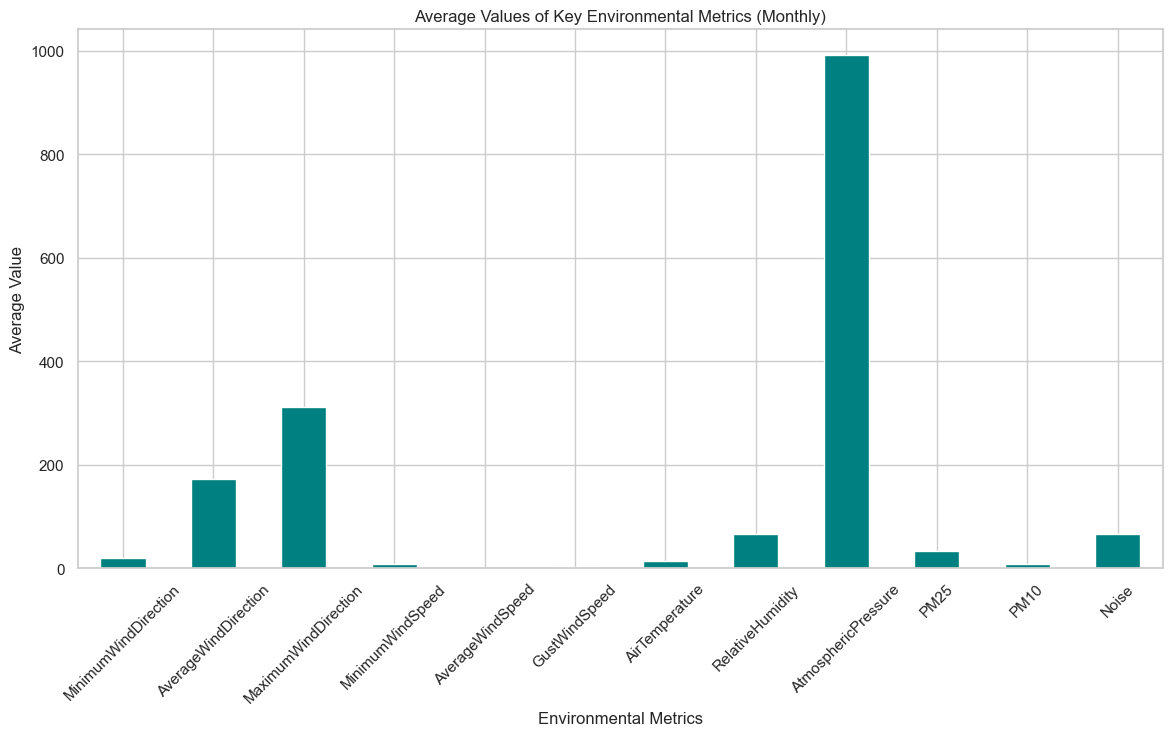

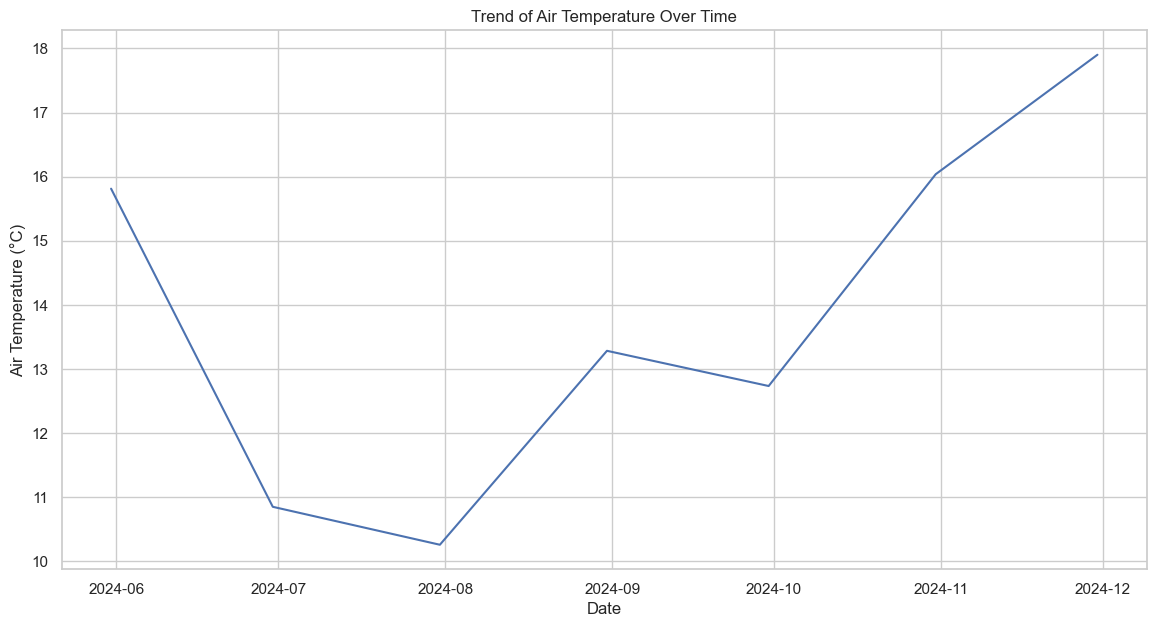

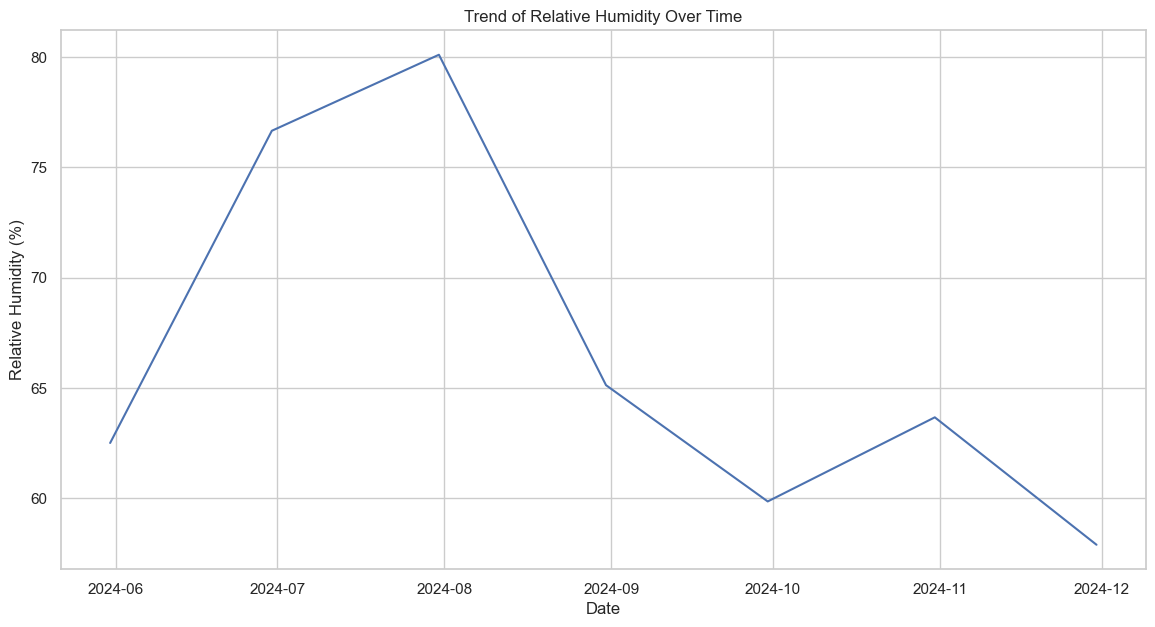

In [47]:
# Monthly averages of key environmental metrics
plt.figure(figsize=(14, 7))
monthly_avg_microclimate = monthly_microclimate.mean()
monthly_avg_microclimate.plot(kind='bar', color='teal')
plt.title('Average Values of Key Environmental Metrics (Monthly)')
plt.xlabel('Environmental Metrics')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.show()

# Trend analysis: Temperature over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_microclimate, x=monthly_microclimate.index, y='AirTemperature')
plt.title('Trend of Air Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Air Temperature (°C)')
plt.show()

# Trend analysis: Relative Humidity over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_microclimate, x=monthly_microclimate.index, y='RelativeHumidity')
plt.title('Trend of Relative Humidity Over Time')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.show()


# Summary Statistics for Service Requests:

# Summary statistics for service request data
service_summary = cleaned_service_data.groupby('CATEGORY').size().sort_values(ascending=False).reset_index(name='Request_Count')
service_summary.columns = ['Category', 'Total Requests']
print("Summary of Service Requests by Category:")
print(service_summary)

# Save to CSV for reporting
service_summary.to_csv('service_requests_summary.csv', index=False)


# Summarize Trends for Monthly Analysis:

In [51]:
# Average monthly requests
avg_monthly_requests = service_trend.groupby(service_trend['Date'].dt.month)['Request_Count'].mean().reset_index()
avg_monthly_requests.columns = ['Month', 'Average Requests']
avg_monthly_requests.to_csv('average_monthly_service_requests.csv', index=False)

# Print and save for report
print("Average Monthly Requests:")
print(avg_monthly_requests)


Average Monthly Requests:
    Month  Average Requests
0       1       1887.500000
1       2       2130.000000
2       3       2086.000000
3       4       1982.000000
4       5       1970.000000
5       6       1818.500000
6       7       1956.000000
7       8       2016.500000
8       9       1912.000000
9      10       1953.500000
10     11       1173.333333
11     12       1767.500000


# Summarize Microclimate Data:

In [53]:
# Summary of microclimate data
microclimate_summary = monthly_microclimate.describe().transpose()
print("Summary Statistics of Monthly Microclimate Data:")
print(microclimate_summary)

# Save to CSV for reporting
microclimate_summary.to_csv('microclimate_data_summary.csv')


Summary Statistics of Monthly Microclimate Data:
                      count        mean        std         min         25%  \
MinimumWindDirection    7.0   19.540097   3.569914   14.445388   17.469950   
AverageWindDirection    7.0  173.059654  11.211329  158.445801  166.436002   
MaximumWindDirection    7.0  311.419831   7.592632  300.902641  305.764337   
MinimumWindSpeed        7.0    8.896968  14.707827    0.196436    0.239484   
AverageWindSpeed        7.0    1.134593   0.178593    0.836776    1.060174   
GustWindSpeed           7.0    3.615416   0.536987    2.844555    3.367387   
AirTemperature          7.0   13.839299   2.844271   10.257044   11.791309   
RelativeHumidity        7.0   66.543636   8.489260   57.891048   61.179557   
AtmosphericPressure     7.0  991.753909  40.529348  918.179222  980.744575   
PM25                    7.0   32.690622  45.108842    3.835524    5.732395   
PM10                    7.0    8.088360   3.249550    4.843220    5.465552   
Noise          

# In-Depth Microclimate Data Analysis:

Summary Statistics of Monthly Microclimate Data:
                      count        mean        std         min         25%  \
MinimumWindDirection    7.0   19.540097   3.569914   14.445388   17.469950   
AverageWindDirection    7.0  173.059654  11.211329  158.445801  166.436002   
MaximumWindDirection    7.0  311.419831   7.592632  300.902641  305.764337   
MinimumWindSpeed        7.0    8.896968  14.707827    0.196436    0.239484   
AverageWindSpeed        7.0    1.134593   0.178593    0.836776    1.060174   
GustWindSpeed           7.0    3.615416   0.536987    2.844555    3.367387   
AirTemperature          7.0   13.839299   2.844271   10.257044   11.791309   
RelativeHumidity        7.0   66.543636   8.489260   57.891048   61.179557   
AtmosphericPressure     7.0  991.753909  40.529348  918.179222  980.744575   
PM25                    7.0   32.690622  45.108842    3.835524    5.732395   
PM10                    7.0    8.088360   3.249550    4.843220    5.465552   
Noise          

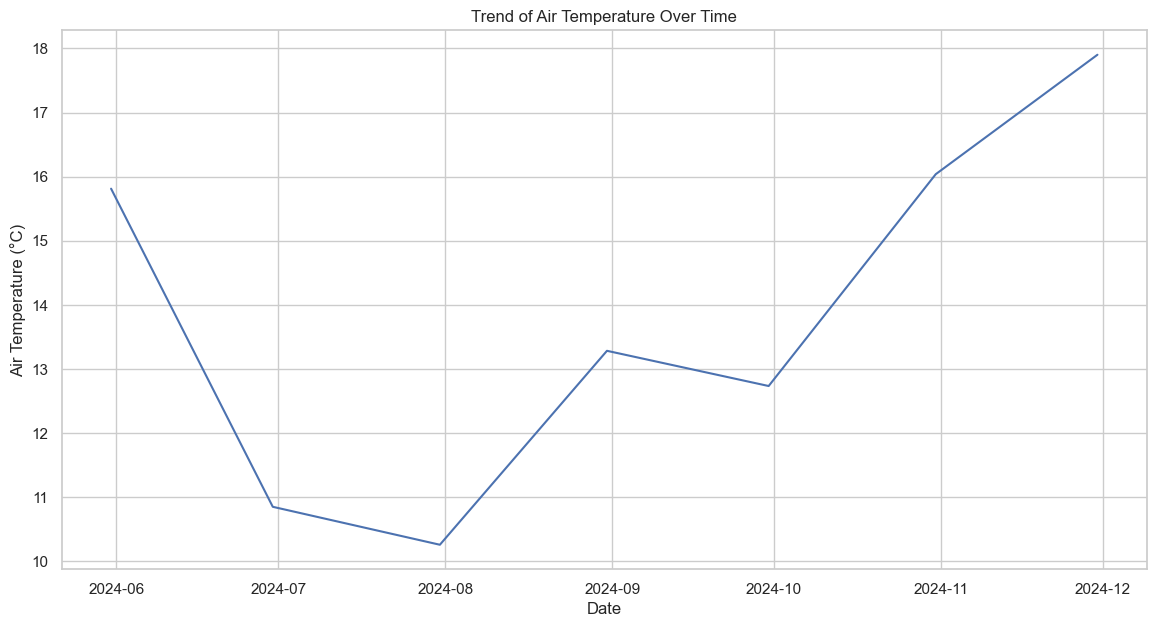

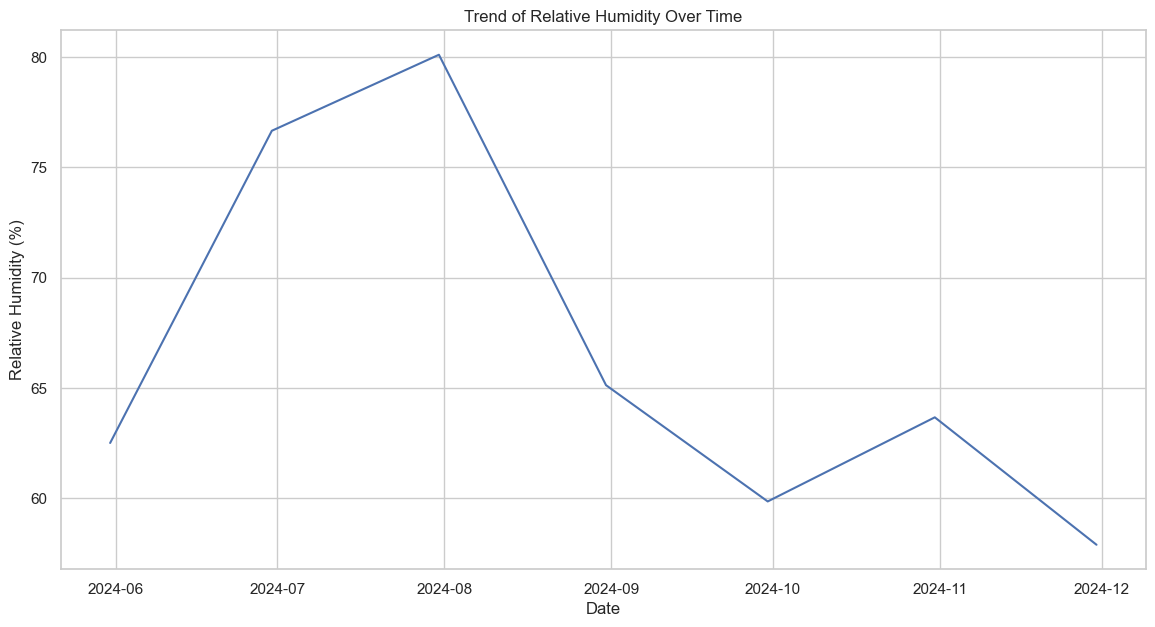

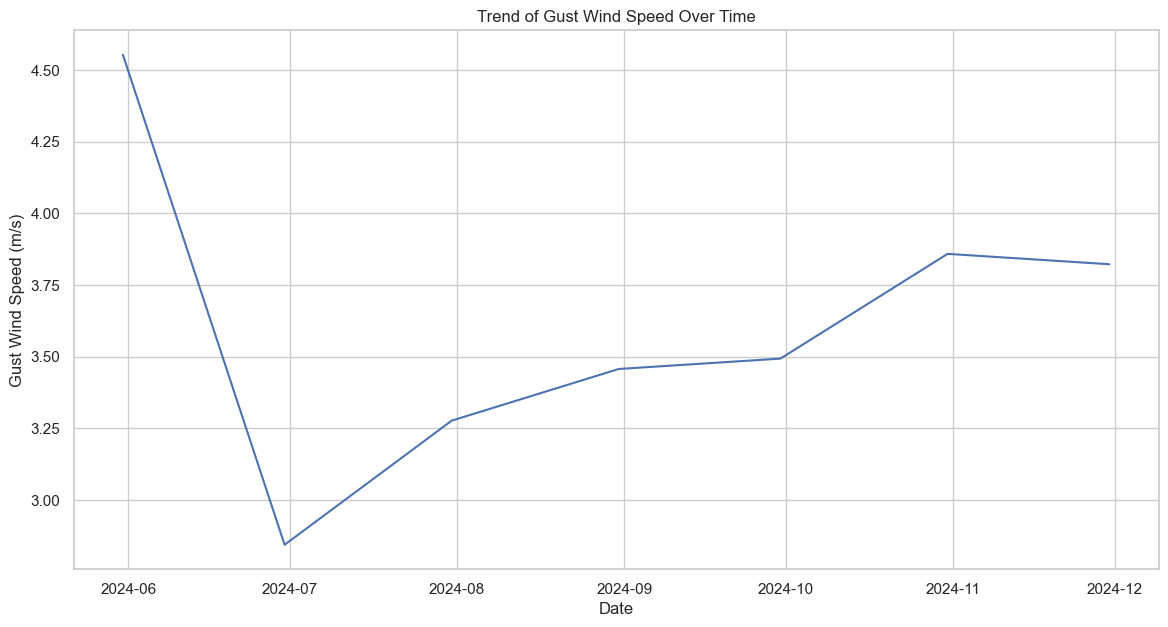

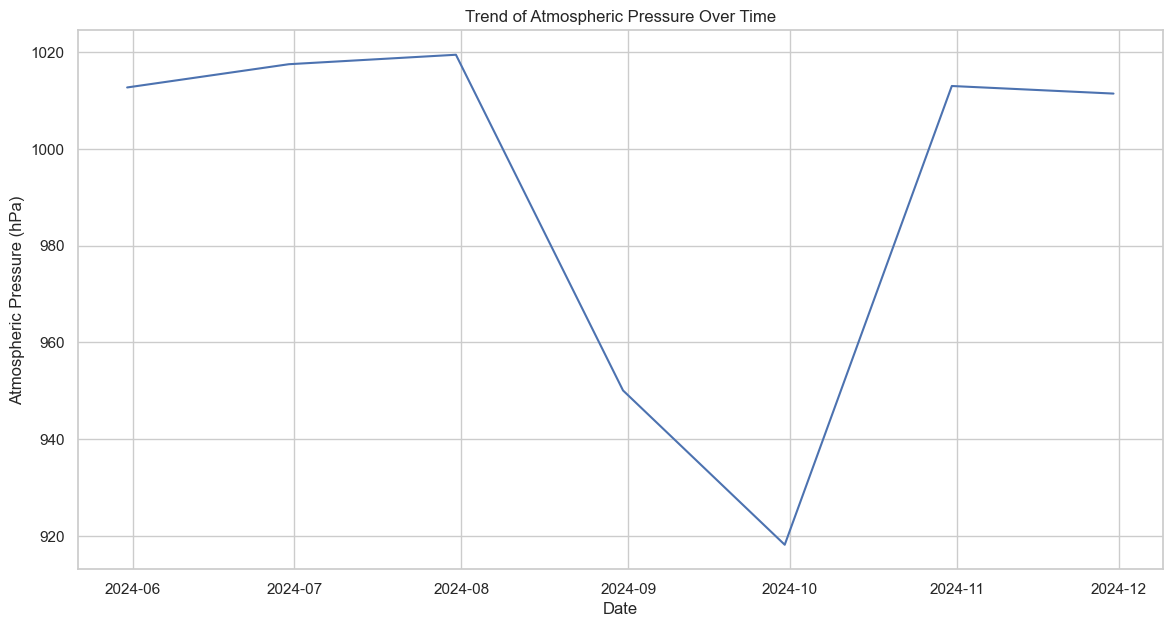

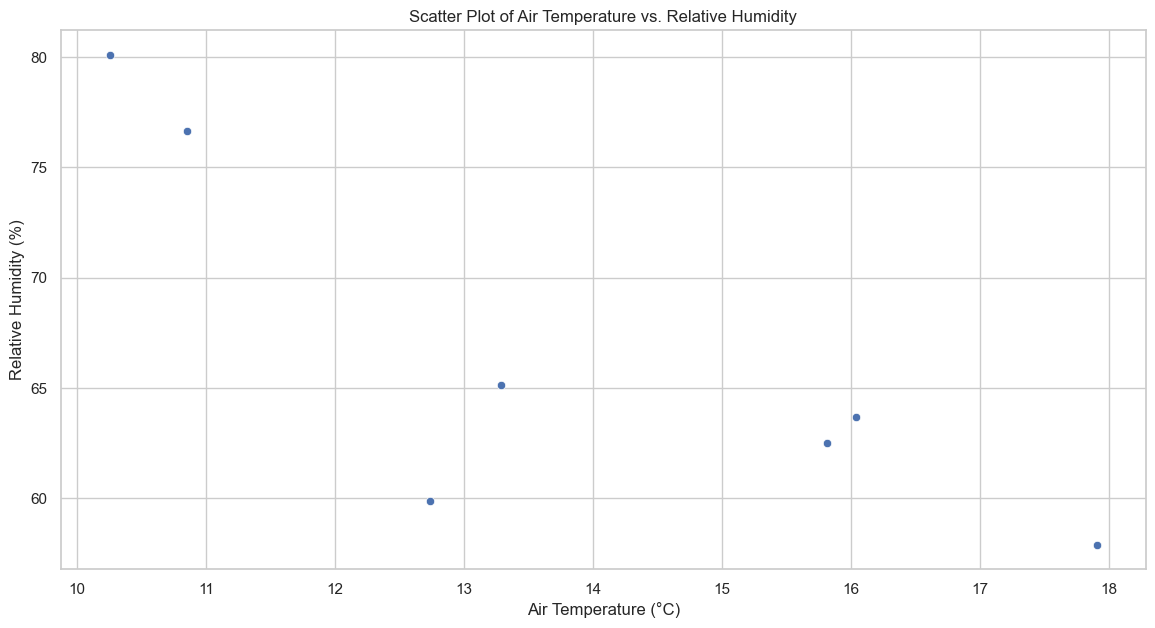

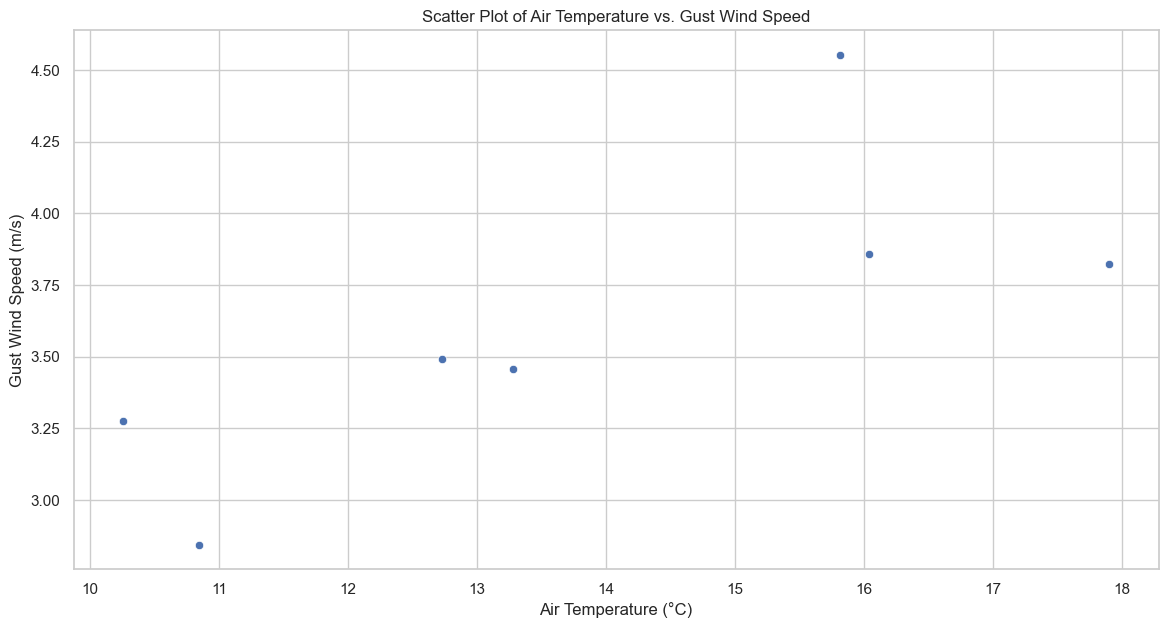

In [59]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Configure Seaborn for consistent styling
sns.set(style="whitegrid")

# Display basic summary statistics of the microclimate data
microclimate_summary = monthly_microclimate.describe().transpose()
print("Summary Statistics of Monthly Microclimate Data:")
print(microclimate_summary)

# Visualize trends over time for key microclimate metrics
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_microclimate, x=monthly_microclimate.index, y='AirTemperature')
plt.title('Trend of Air Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Air Temperature (°C)')
plt.show()

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_microclimate, x=monthly_microclimate.index, y='RelativeHumidity')
plt.title('Trend of Relative Humidity Over Time')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.show()

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_microclimate, x=monthly_microclimate.index, y='GustWindSpeed')
plt.title('Trend of Gust Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Gust Wind Speed (m/s)')
plt.show()

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_microclimate, x=monthly_microclimate.index, y='AtmosphericPressure')
plt.title('Trend of Atmospheric Pressure Over Time')
plt.xlabel('Date')
plt.ylabel('Atmospheric Pressure (hPa)')
plt.show()

# Additional scatter plots to observe relationships
plt.figure(figsize=(14, 7))
sns.scatterplot(data=monthly_microclimate, x='AirTemperature', y='RelativeHumidity')
plt.title('Scatter Plot of Air Temperature vs. Relative Humidity')
plt.xlabel('Air Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()

plt.figure(figsize=(14, 7))
sns.scatterplot(data=monthly_microclimate, x='AirTemperature', y='GustWindSpeed')
plt.title('Scatter Plot of Air Temperature vs. Gust Wind Speed')
plt.xlabel('Air Temperature (°C)')
plt.ylabel('Gust Wind Speed (m/s)')
plt.show()


# Seasonal Maintenance Planning and Lag Analysis:

No combined data available after merging for analysis.


Summary Statistics for Microclimate Data in 2024:
       MinimumWindDirection  AverageWindDirection  MaximumWindDirection  \
count              7.000000              7.000000              7.000000   
mean              19.540097            173.059654            311.419831   
std                3.569914             11.211329              7.592632   
min               14.445388            158.445801            300.902641   
25%               17.469950            166.436002            305.764337   
50%               18.307524            173.189719            312.398865   
75%               22.660422            176.583704            316.400952   
max               23.767024            193.742647            322.306735   

       MinimumWindSpeed  AverageWindSpeed  GustWindSpeed  AirTemperature  \
count          7.000000          7.000000       7.000000        7.000000   
mean           8.896968          1.134593       3.615416       13.839299   
std           14.707827          0.178593     

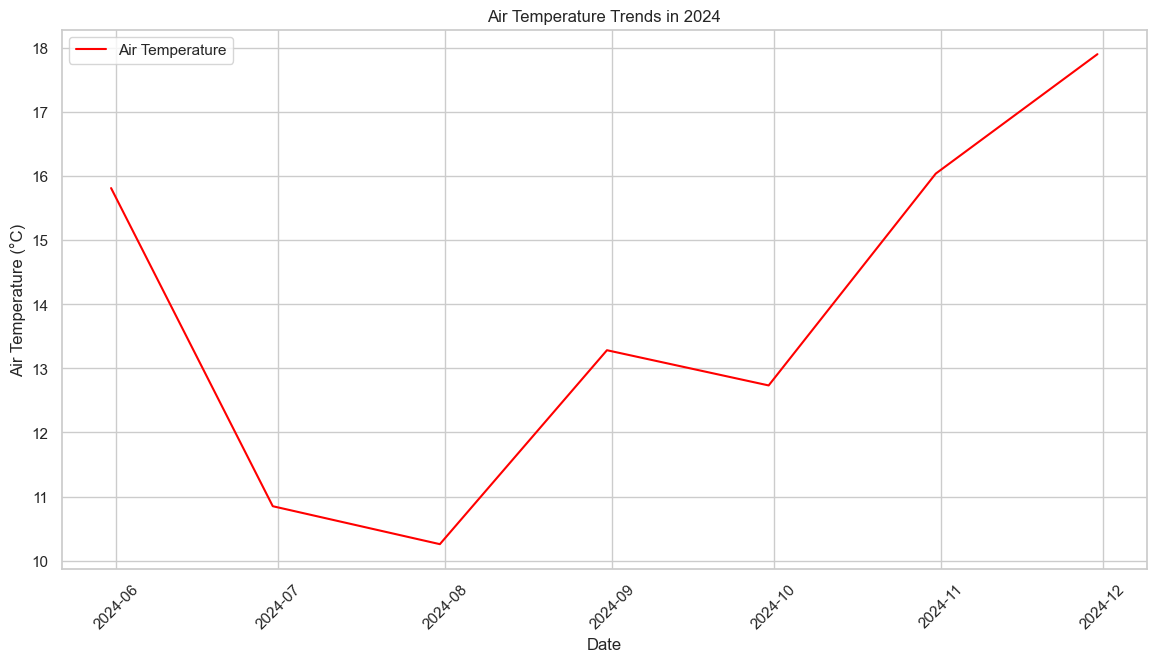

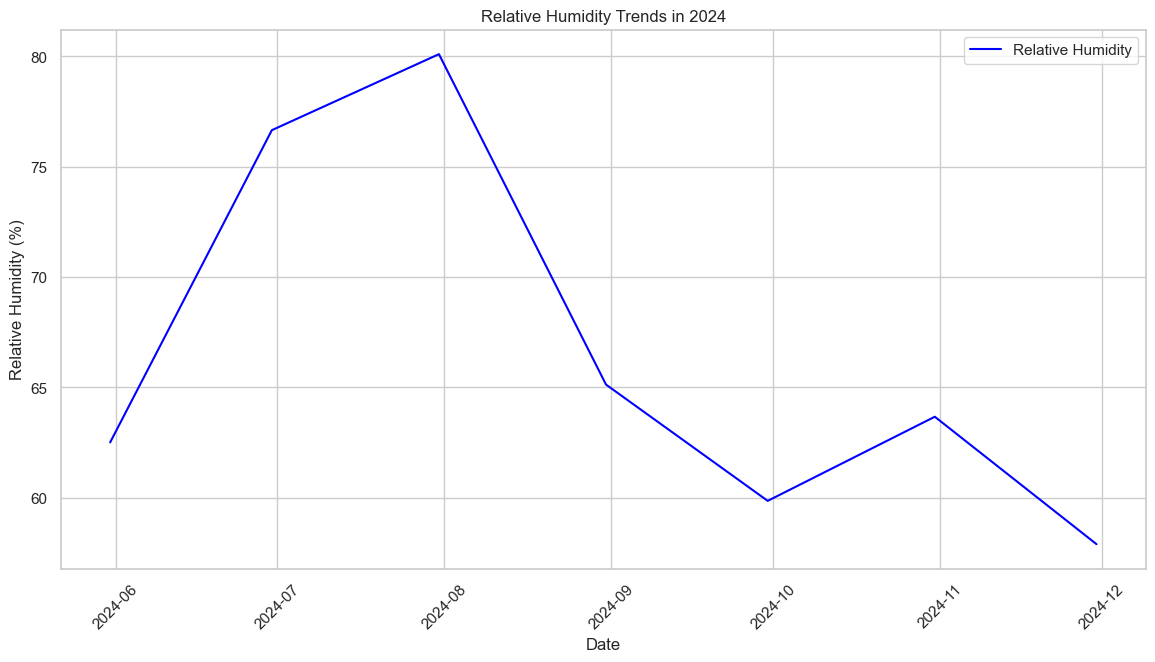

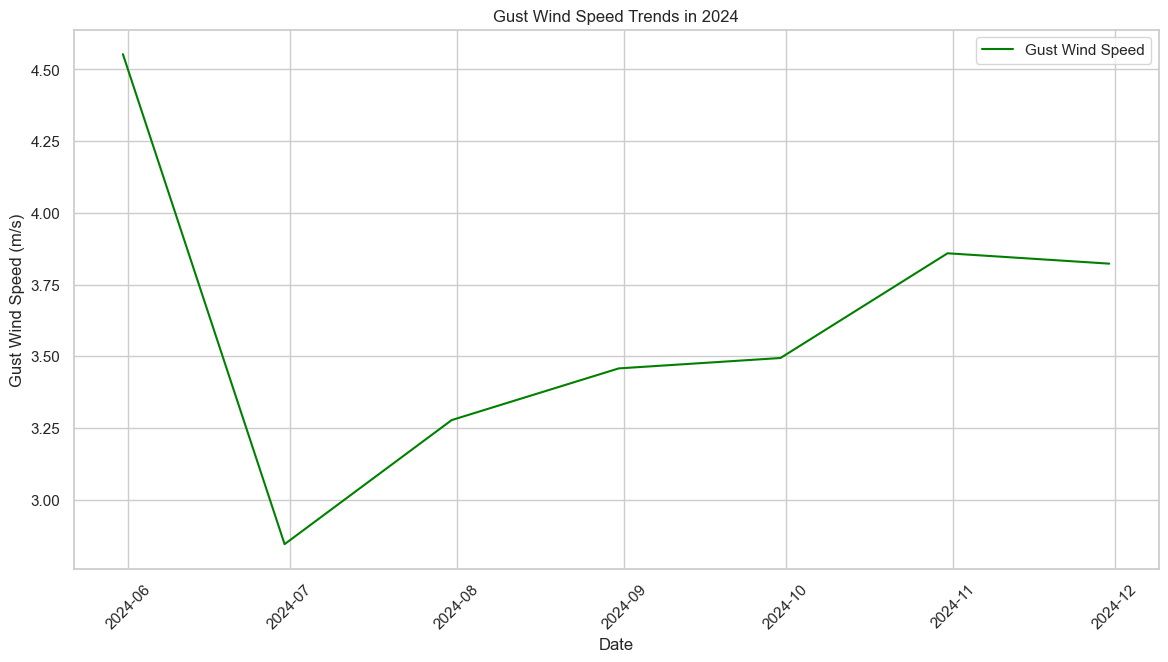

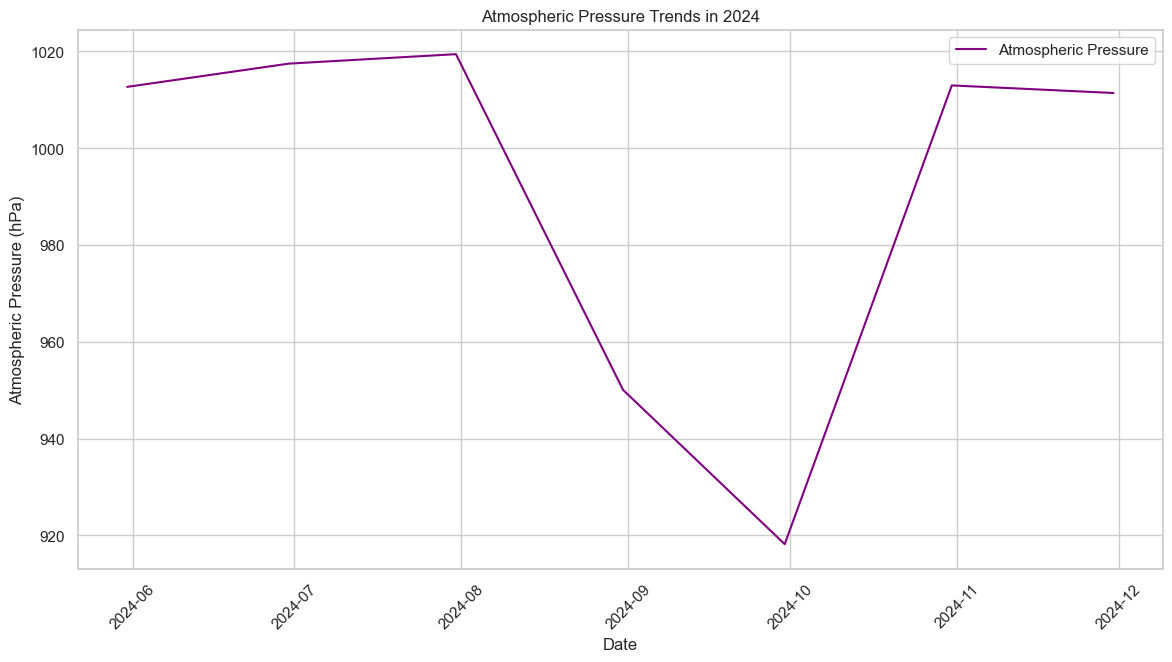

In [96]:
# Filter the monthly_microclimate data for the year 2024
microclimate_2024 = monthly_microclimate.loc['2024']

# Check basic statistics for microclimate data in 2024
print("Summary Statistics for Microclimate Data in 2024:")
print(microclimate_2024.describe())

# Plot trends of key metrics over time in 2024
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Plotting air temperature over 2024
plt.figure(figsize=(14, 7))
sns.lineplot(data=microclimate_2024, x=microclimate_2024.index, y='AirTemperature', label='Air Temperature', color='red')
plt.title('Air Temperature Trends in 2024')
plt.xlabel('Date')
plt.ylabel('Air Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

# Plotting relative humidity over 2024
plt.figure(figsize=(14, 7))
sns.lineplot(data=microclimate_2024, x=microclimate_2024.index, y='RelativeHumidity', label='Relative Humidity', color='blue')
plt.title('Relative Humidity Trends in 2024')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.xticks(rotation=45)
plt.show()

# Plotting gust wind speed over 2024
plt.figure(figsize=(14, 7))
sns.lineplot(data=microclimate_2024, x=microclimate_2024.index, y='GustWindSpeed', label='Gust Wind Speed', color='green')
plt.title('Gust Wind Speed Trends in 2024')
plt.xlabel('Date')
plt.ylabel('Gust Wind Speed (m/s)')
plt.xticks(rotation=45)
plt.show()

# Plotting atmospheric pressure over 2024
plt.figure(figsize=(14, 7))
sns.lineplot(data=microclimate_2024, x=microclimate_2024.index, y='AtmosphericPressure', label='Atmospheric Pressure', color='purple')
plt.title('Atmospheric Pressure Trends in 2024')
plt.xlabel('Date')
plt.ylabel('Atmospheric Pressure (hPa)')
plt.xticks(rotation=45)
plt.show()

